In [3]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

In [5]:
cd=pd.read_csv("crimedata.csv")

In [6]:
cd.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [7]:
cd.columns

Index(['Unnamed: 0', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [9]:
cd.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [10]:
cd.describe

<bound method NDFrame.describe of         Unnamed: 0  Murder  Assault  UrbanPop  Rape
0          Alabama    13.2      236        58  21.2
1           Alaska    10.0      263        48  44.5
2          Arizona     8.1      294        80  31.0
3         Arkansas     8.8      190        50  19.5
4       California     9.0      276        91  40.6
5         Colorado     7.9      204        78  38.7
6      Connecticut     3.3      110        77  11.1
7         Delaware     5.9      238        72  15.8
8          Florida    15.4      335        80  31.9
9          Georgia    17.4      211        60  25.8
10          Hawaii     5.3       46        83  20.2
11           Idaho     2.6      120        54  14.2
12        Illinois    10.4      249        83  24.0
13         Indiana     7.2      113        65  21.0
14            Iowa     2.2       56        57  11.3
15          Kansas     6.0      115        66  18.0
16        Kentucky     9.7      109        52  16.3
17       Louisiana    15.4    

In [11]:
cd.isnull().sum() # There is no null vaules in my data set 

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [12]:
cd.shape # 50 rows and 5 columns 

(50, 5)

In [16]:
def norm_func(i):
    x = (i-i.min())	/	(i.max()	-	i.min())
    return (x)

In [17]:
df_norm1 = norm_func(cd.iloc[:,1:]) # Normalizing the data
df_norm1

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


In [18]:
from scipy.cluster.hierarchy import linkage 

import scipy.cluster.hierarchy as sch # for creating dendrogram 

In [20]:
type(df_norm1) ## Checking the which data type after converting the normalization 

pandas.core.frame.DataFrame

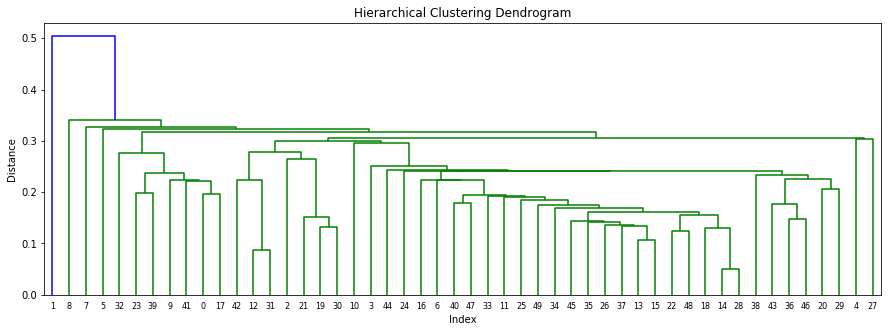

In [21]:
#p = np.array(df_norm) # converting into numpy array format 
z = linkage(df_norm1, method="single",metric="euclidean")

plt.figure(figsize=(15, 5));plt.title('Hierarchical Clustering Dendrogram');plt.xlabel('Index');plt.ylabel('Distance')
sch.dendrogram(
    z,
    leaf_rotation=0.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

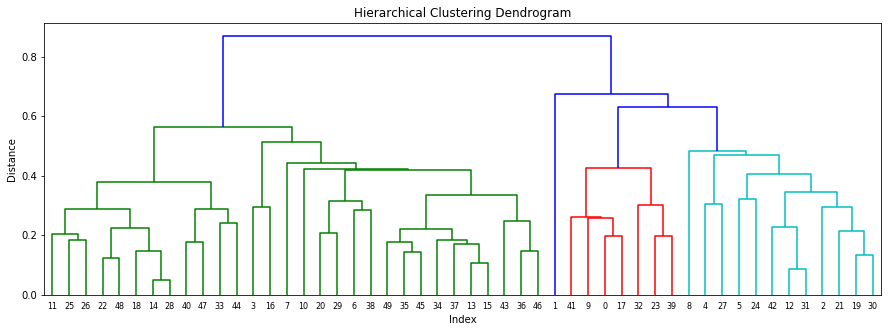

In [23]:
#p = np.array(df_norm) # converting into numpy array format 
z = linkage(df_norm1, method="average",metric="euclidean") ## distance between the clusters , method= average 

plt.figure(figsize=(15, 5));plt.title('Hierarchical Clustering Dendrogram');plt.xlabel('Index');plt.ylabel('Distance')
sch.dendrogram(
    z,
    leaf_rotation=0.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

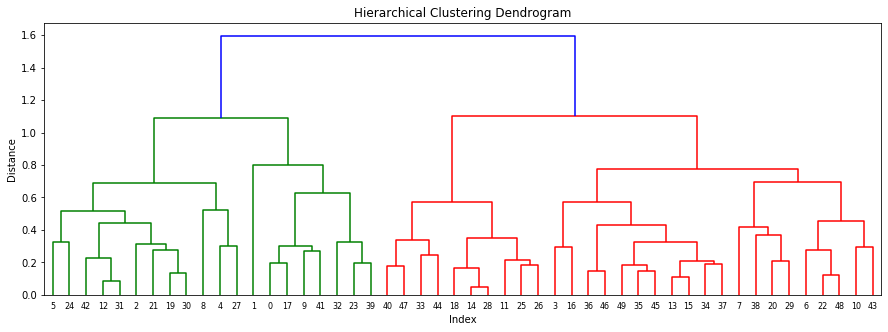

In [25]:
#p = np.array(df_norm) # converting into numpy array format 
z = linkage(df_norm1, method="complete",metric="euclidean") ## distance between the clusters , method= complete

plt.figure(figsize=(15, 5));plt.title('Hierarchical Clustering Dendrogram');plt.xlabel('Index');plt.ylabel('Distance')
sch.dendrogram(
    z,
    leaf_rotation=0.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [31]:
from sklearn.cluster import AgglomerativeClustering 
h_complete = AgglomerativeClustering(n_clusters=5,linkage='single',affinity = "euclidean").fit(df_norm1) 







In [32]:
cluster_labels=pd.Series(h_complete.labels_)
cluster_labels

0     0
1     3
2     0
3     0
4     0
5     4
6     0
7     1
8     2
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    0
49    0
dtype: int64

In [33]:
cd['clust']=cluster_labels # creating a  new column and assigning it to new column 
cd = cd.iloc[:,]

In [34]:
cd.head

<bound method NDFrame.head of         Unnamed: 0  Murder  Assault  UrbanPop  Rape  clust
0          Alabama    13.2      236        58  21.2      0
1           Alaska    10.0      263        48  44.5      3
2          Arizona     8.1      294        80  31.0      0
3         Arkansas     8.8      190        50  19.5      0
4       California     9.0      276        91  40.6      0
5         Colorado     7.9      204        78  38.7      4
6      Connecticut     3.3      110        77  11.1      0
7         Delaware     5.9      238        72  15.8      1
8          Florida    15.4      335        80  31.9      2
9          Georgia    17.4      211        60  25.8      0
10          Hawaii     5.3       46        83  20.2      0
11           Idaho     2.6      120        54  14.2      0
12        Illinois    10.4      249        83  24.0      0
13         Indiana     7.2      113        65  21.0      0
14            Iowa     2.2       56        57  11.3      0
15          Kansas     6.0

In [35]:
cluster_labels

0     0
1     3
2     0
3     0
4     0
5     4
6     0
7     1
8     2
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    0
49    0
dtype: int64

In [36]:
cd['clust']=cluster_labels

In [37]:
cd['clust']

0     0
1     3
2     0
3     0
4     0
5     4
6     0
7     1
8     2
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    0
49    0
Name: clust, dtype: int64

In [39]:
cd.iloc[:,1:].groupby(cd.clust).mean()

,Murder,Assault,UrbanPop,Rape,clust
clust,,,,,
0,7.613043,163.0,65.195652,20.232609,0.0
1,5.900000,238.0,72.000000,15.800000,1.0
2,15.400000,335.0,80.000000,31.900000,2.0
3,10.000000,263.0,48.000000,44.500000,3.0
4,7.900000,204.0,78.000000,38.700000,4.0


In [40]:
cd

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,3
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,4
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,2
9,Georgia,17.4,211,60,25.8,0
